# Experiments on parameters

This notebook can be used to experiment with the different parameters of the models and see how those affect the outcome of the training. The discussion of the results for each hyper-parameter will be divided between the autoencoder and the deep tica models. As the hyper-parameters might affect them differently.

In [11]:
from deep_cartograph.run import deep_cartograph
from IPython.display import Image, display
from typing import Dict, List
import logging
import shutil
import yaml
import os

# Set logging level
logging.basicConfig(level=logging.INFO)

data_folder="../../../data"
    
def run_deep_cartograph(configuration: Dict, system_name: str, test_name: str):

    # Input trajectory and topology
    input_path = f"{data_folder}/calpha_transitions/input/{system_name}"
    traj_path = os.path.join(input_path, f'{system_name}.dcd')
    top_path = os.path.join(input_path, f'{system_name}.pdb')
        
    # Output folder
    output_folder = f"{data_folder}/calpha_transitions/experiments/output/{system_name}/{test_name}"

    # Clean output folder
    if os.path.exists(output_folder):
        shutil.rmtree(output_folder)

    # Run workflow 
    deep_cartograph(
        configuration = configuration,
        trajectory = traj_path,
        topology = top_path,
        output_folder = output_folder)

def show_results(system_name: str, test_names: List, model_name: str, plot_name: str):

    images = []
    for test_name in test_names:

        # Output folder
        output_folder = f"{data_folder}/calpha_transitions/experiments/output/{system_name}/{test_name}"

        # Training folder
        training_folder = os.path.join(output_folder, 'train_colvars')

        # Model folder
        model_folder = os.path.join(training_folder, model_name)

        # Paths to image
        image_path = os.path.join(model_folder, f'{plot_name}.png')

        # Add image if exists
        if os.path.exists(image_path):
            images.append(Image(filename=image_path, width=500, metadata=dict(system_name=system_name, test_name=test_name, model_name=model_name, plot_name=plot_name)))

    # If no images are found
    if len(images) == 0:
        print(f"No images found for system {system_name}, model {model_name} and plot {plot_name}")
        
    # Display images
    display(*images)

## Batch size

### Autoencoder

Smaller batch sizes can introduce more noise in the gradient updates, which can help the model scape local or sharp minima and find better solutions. Thus generalize better (see relation between training and validation loss). However, smaller batch sizes can also slow down the training process. In this case we have a small dataset and model, so the recommendation is to use a small batch size for the autoencoder.

### Deep tica



In [50]:
# Load initial configuration
config_path = f"{data_folder}/calpha_transitions/experiments/config.yml"

with open(config_path, 'r') as file:
    configuration = yaml.load(file, Loader = yaml.FullLoader)
    
batch_sizes = [16, 32, 64, 128, 256]   # 256 is close to all the samples in the training set (330*0.8 = 264)
system_name = '2olu_A-2olv_A-1'        # Has around 330 frames

test_names = [f'bs_{batch_size}' for batch_size in batch_sizes]

for batch_size, test_name in zip(batch_sizes, test_names):

    # Make a copy of the initial configuration
    test_configuration = configuration.copy()

    # Update batch size
    test_configuration['train_colvars']['common']['training']['general']['batch_size'] = batch_size

    # Run deep cartograph
    run_deep_cartograph(test_configuration, system_name, test_name)

INFO:deep_cartograph:================
INFO:deep_cartograph:Compute features
INFO:deep_cartograph:================
INFO:deep_cartograph:Trajectory file: ../../../data/calpha_transitions/input/2olu_A-2olv_A-1/2olu_A-2olv_A-1.dcd
/shared/work/pnavarro/envs/deep_cartograph/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:317: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "
/shared/work/pnavarro/envs/deep_cartograph/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:747: UserWarning: Unit cell dimensions not found. CRYST1 record set to unitary values.
  warnings.warn("Unit cell dimensions not found. "
/shared/work/pnavarro/envs/deep_cartograph/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:1078: UserWarning: Found no information for attr: 'elements' Using default value of ' '
  warning

<Figure size 500x400 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 640x480 with 0 Axes>

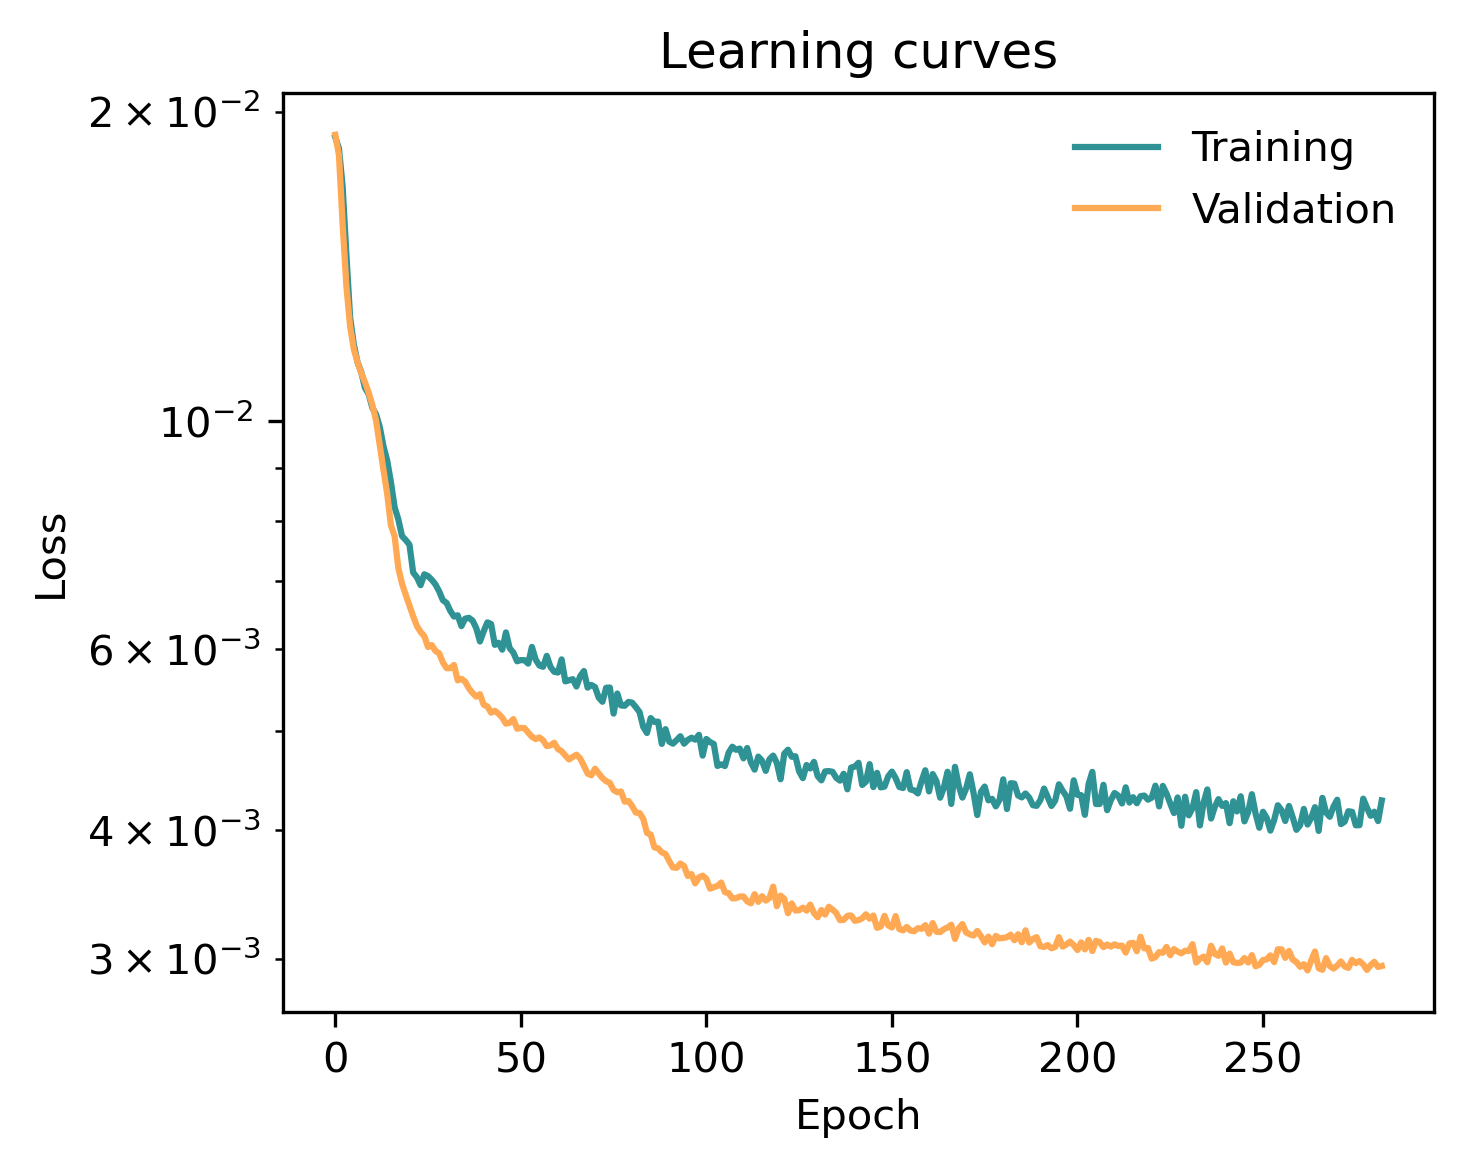

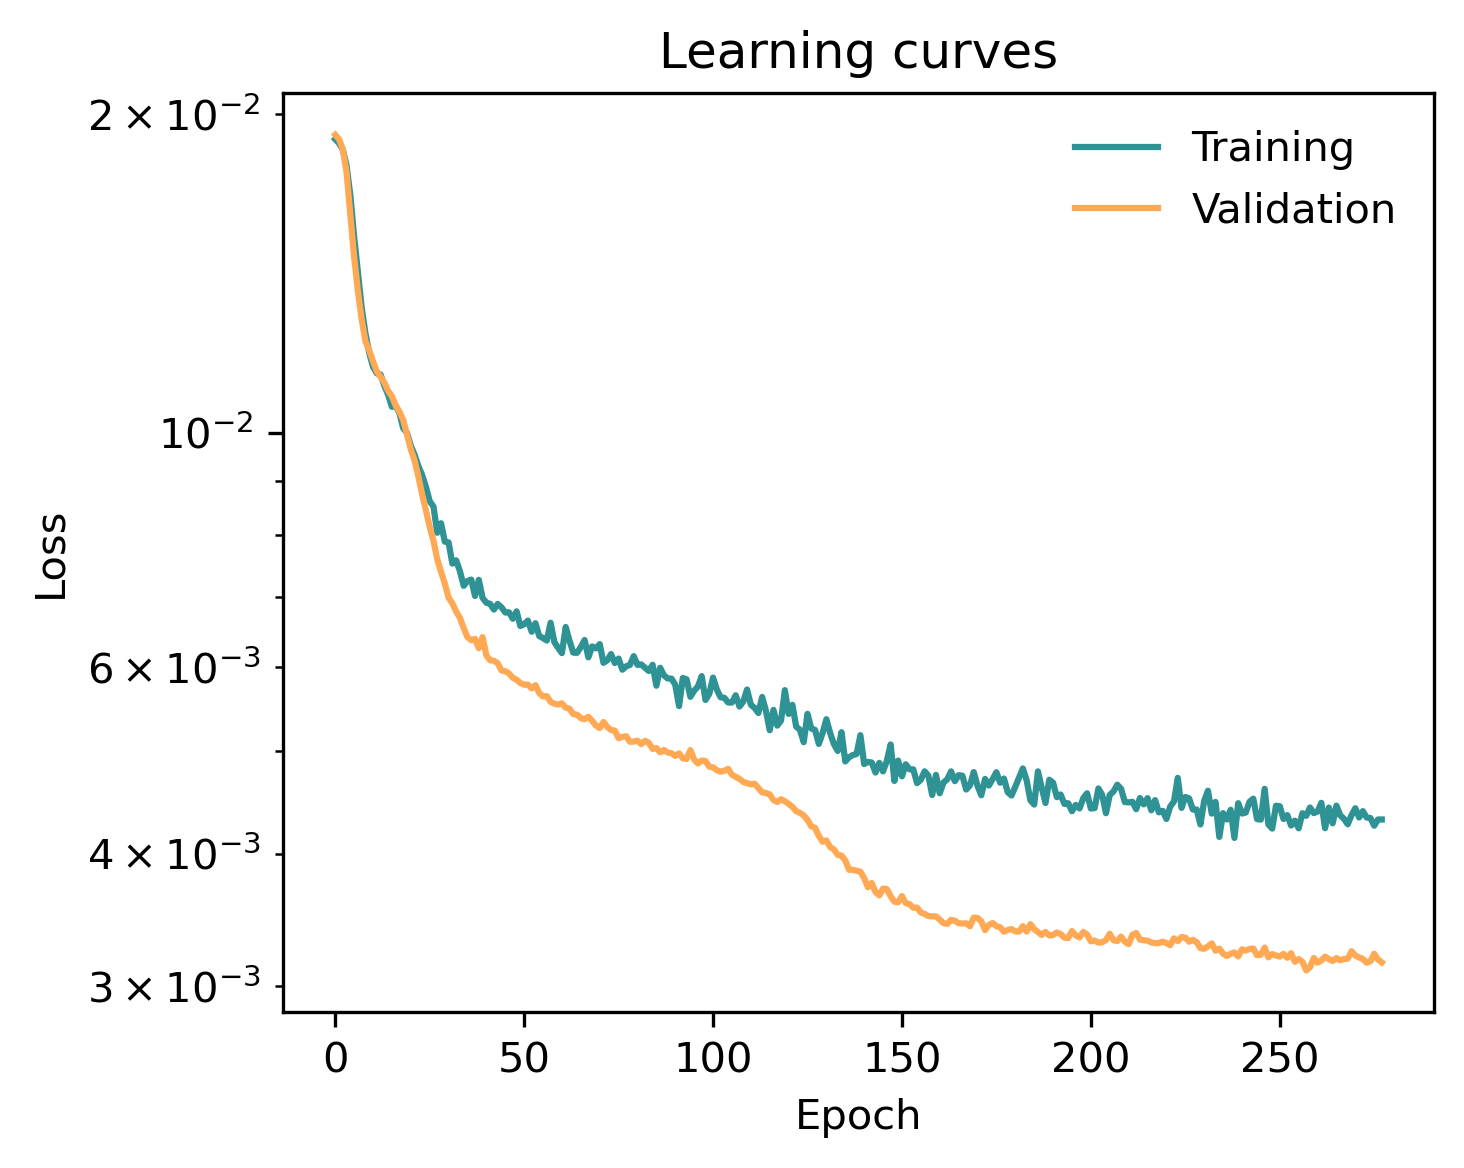

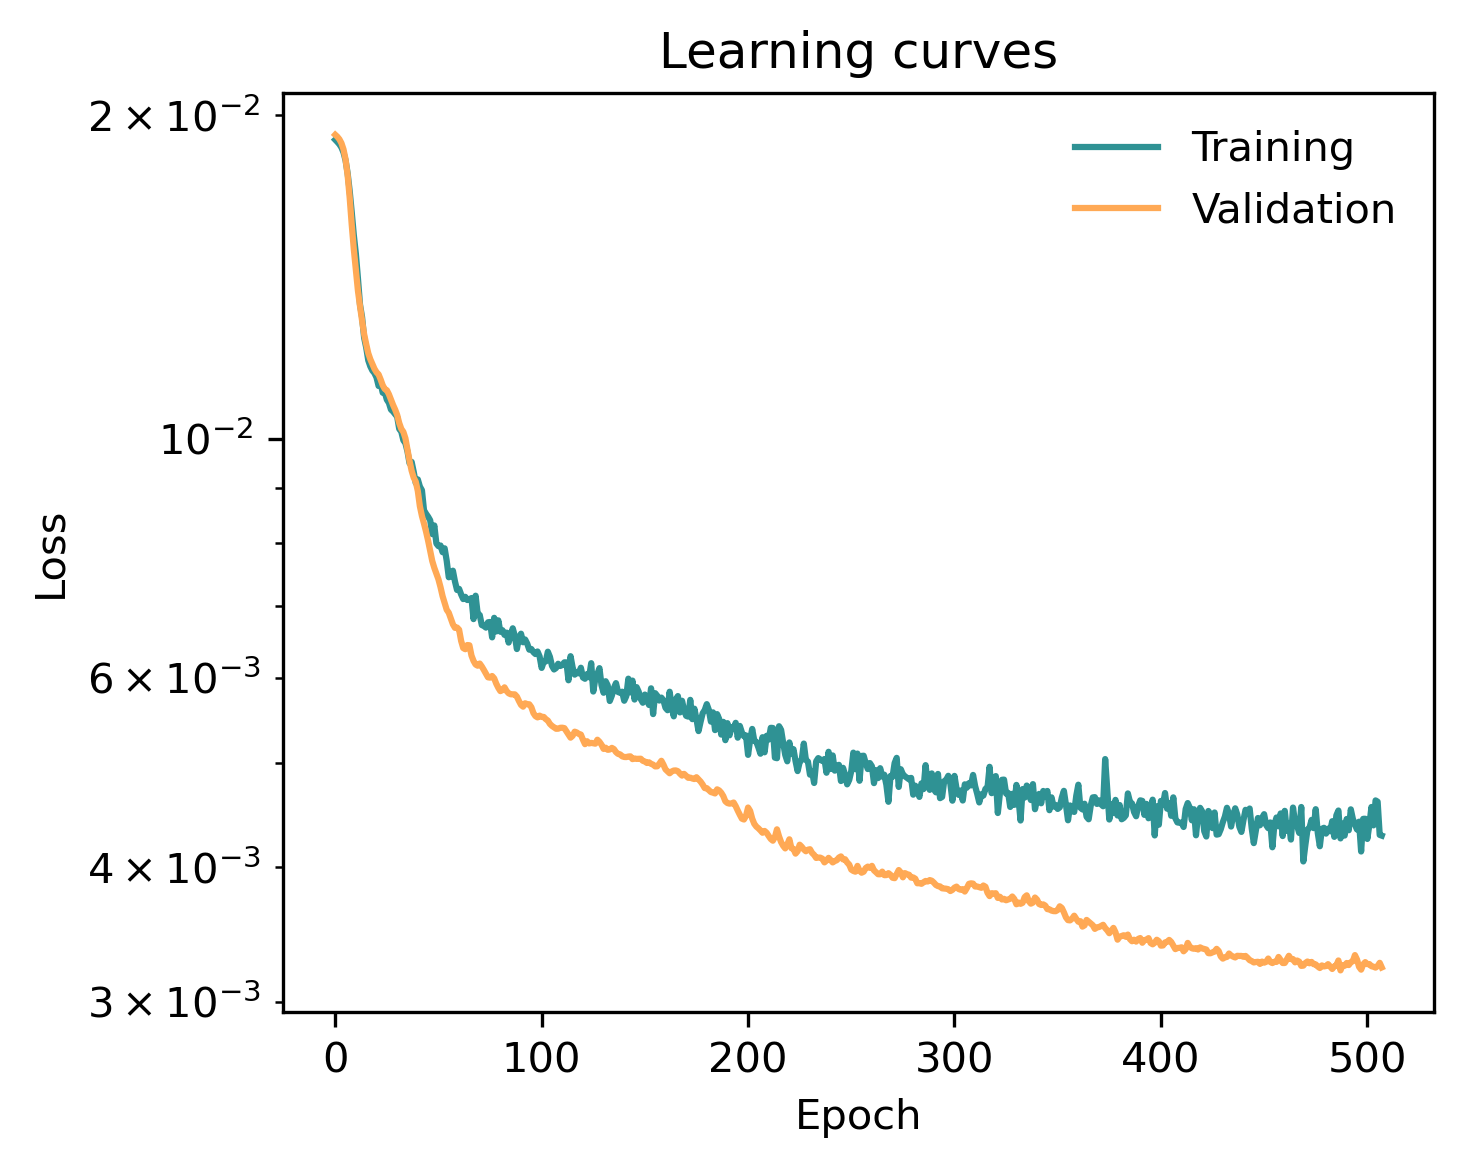

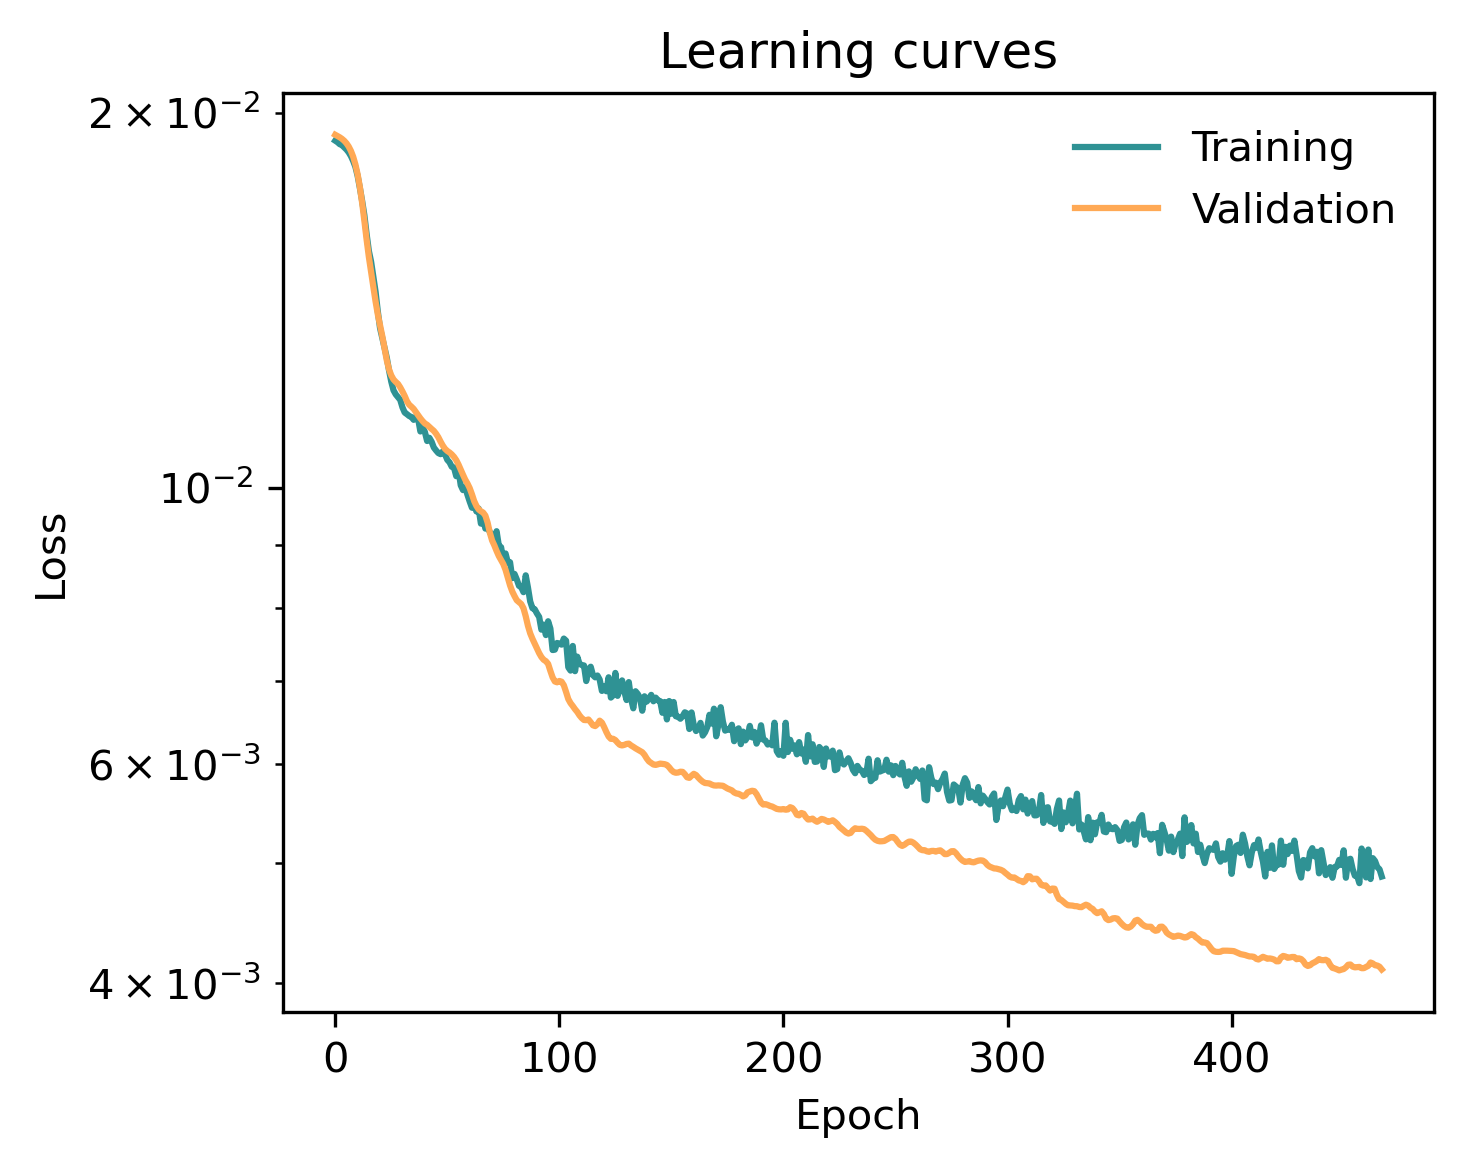

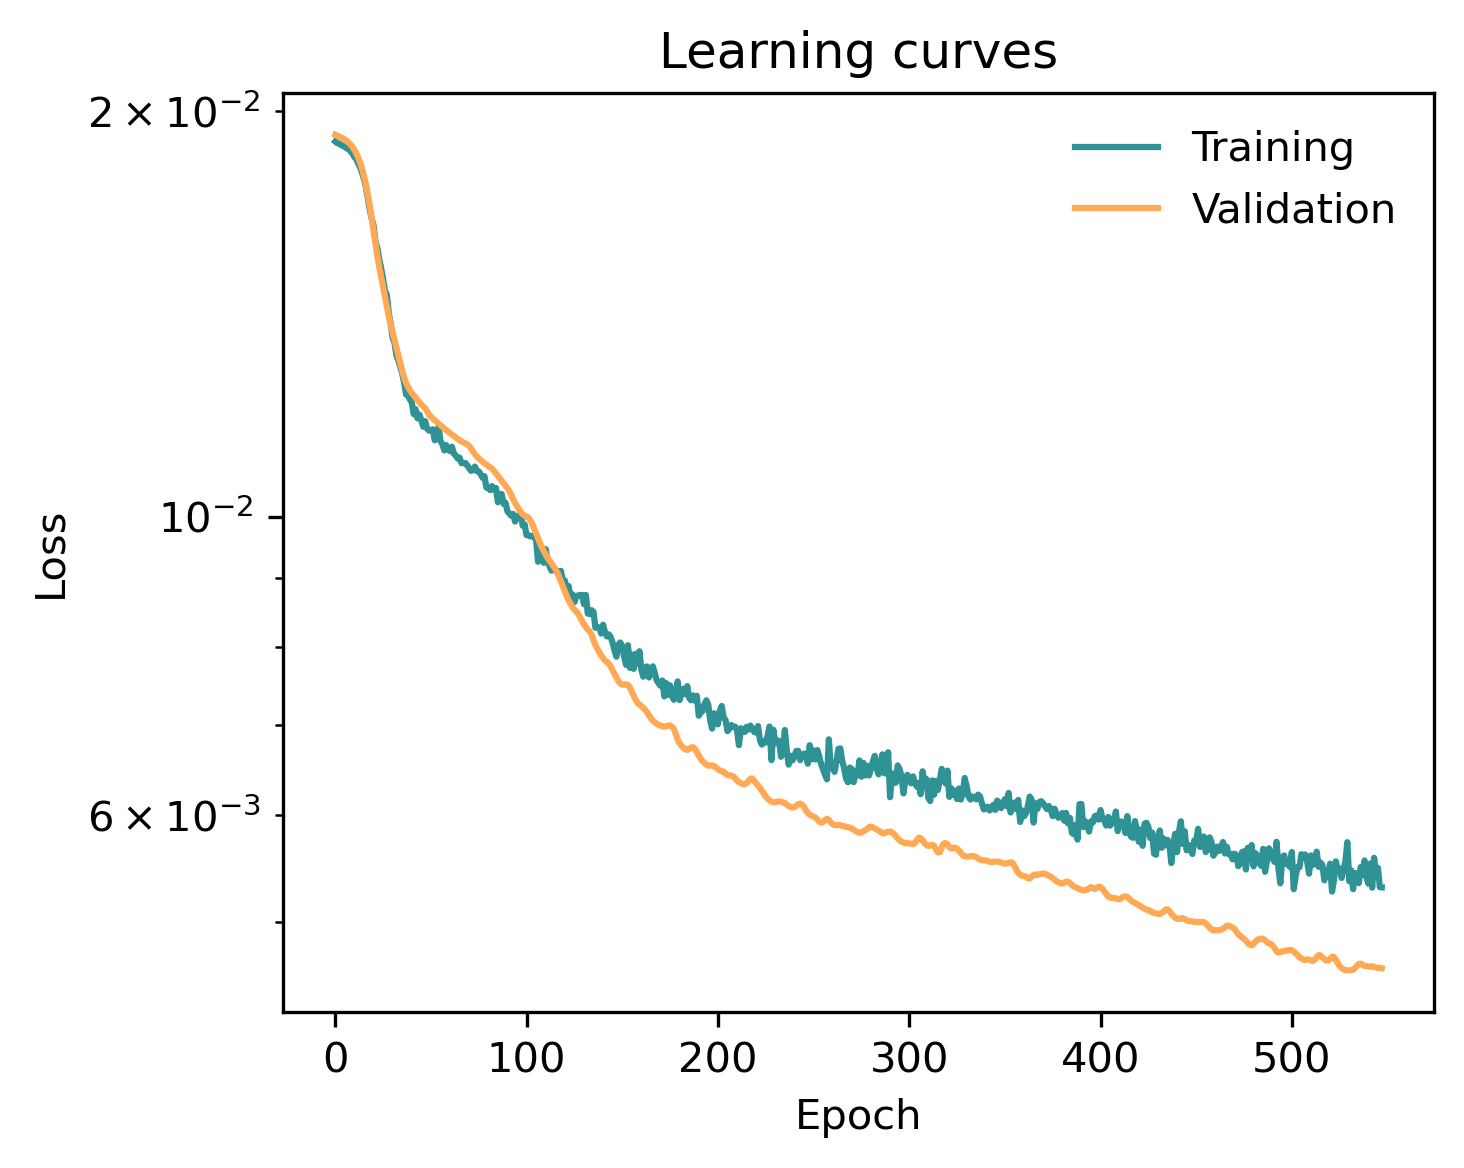

In [51]:
# Show results
show_results(system_name, test_names, 'ae', 'loss')

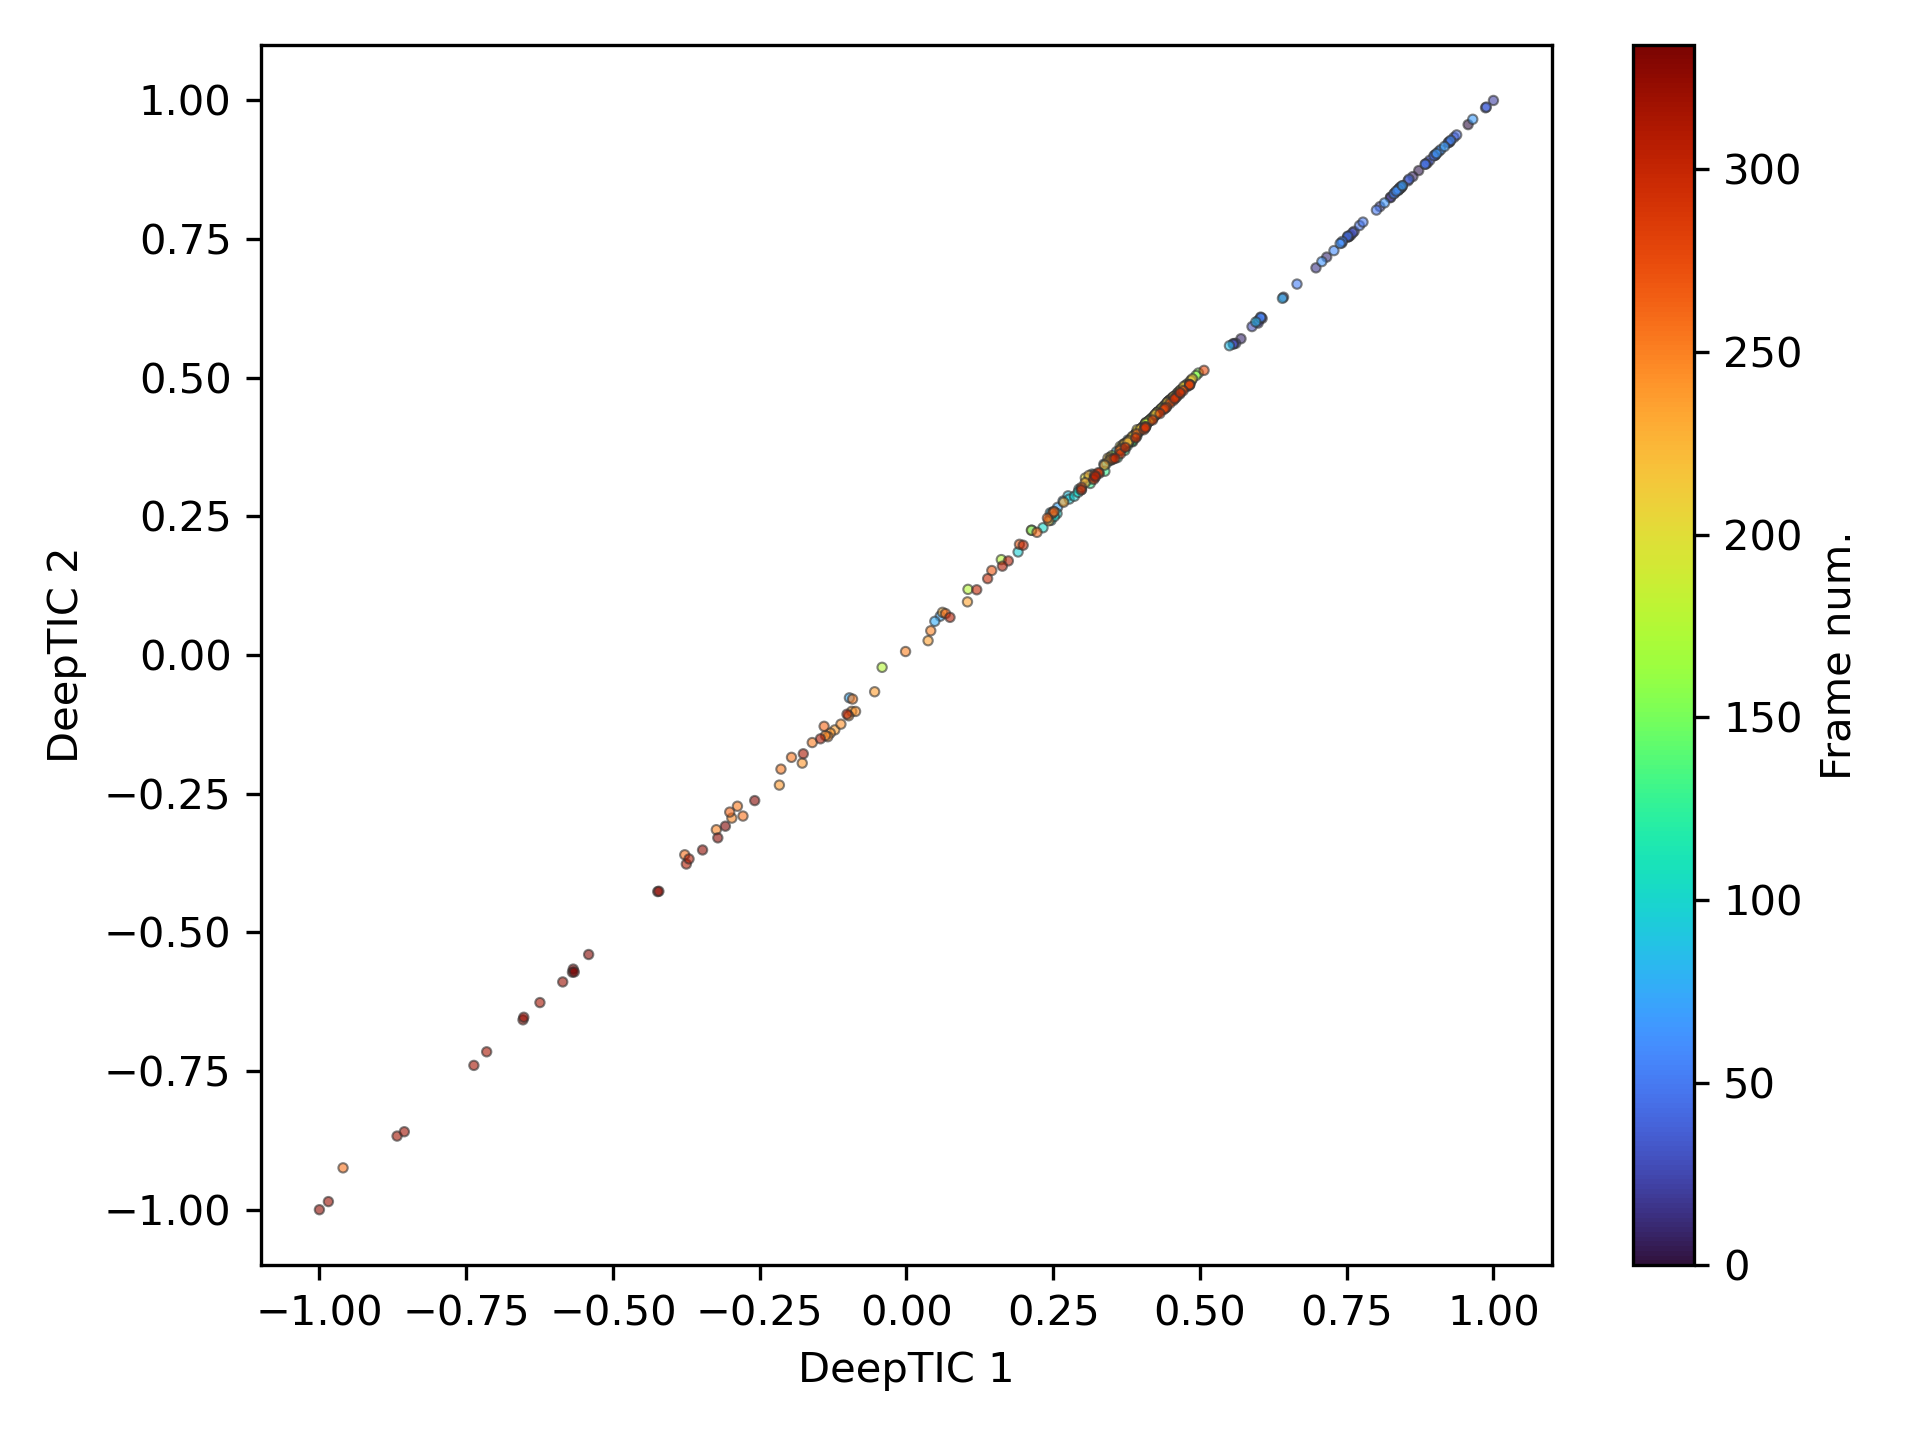

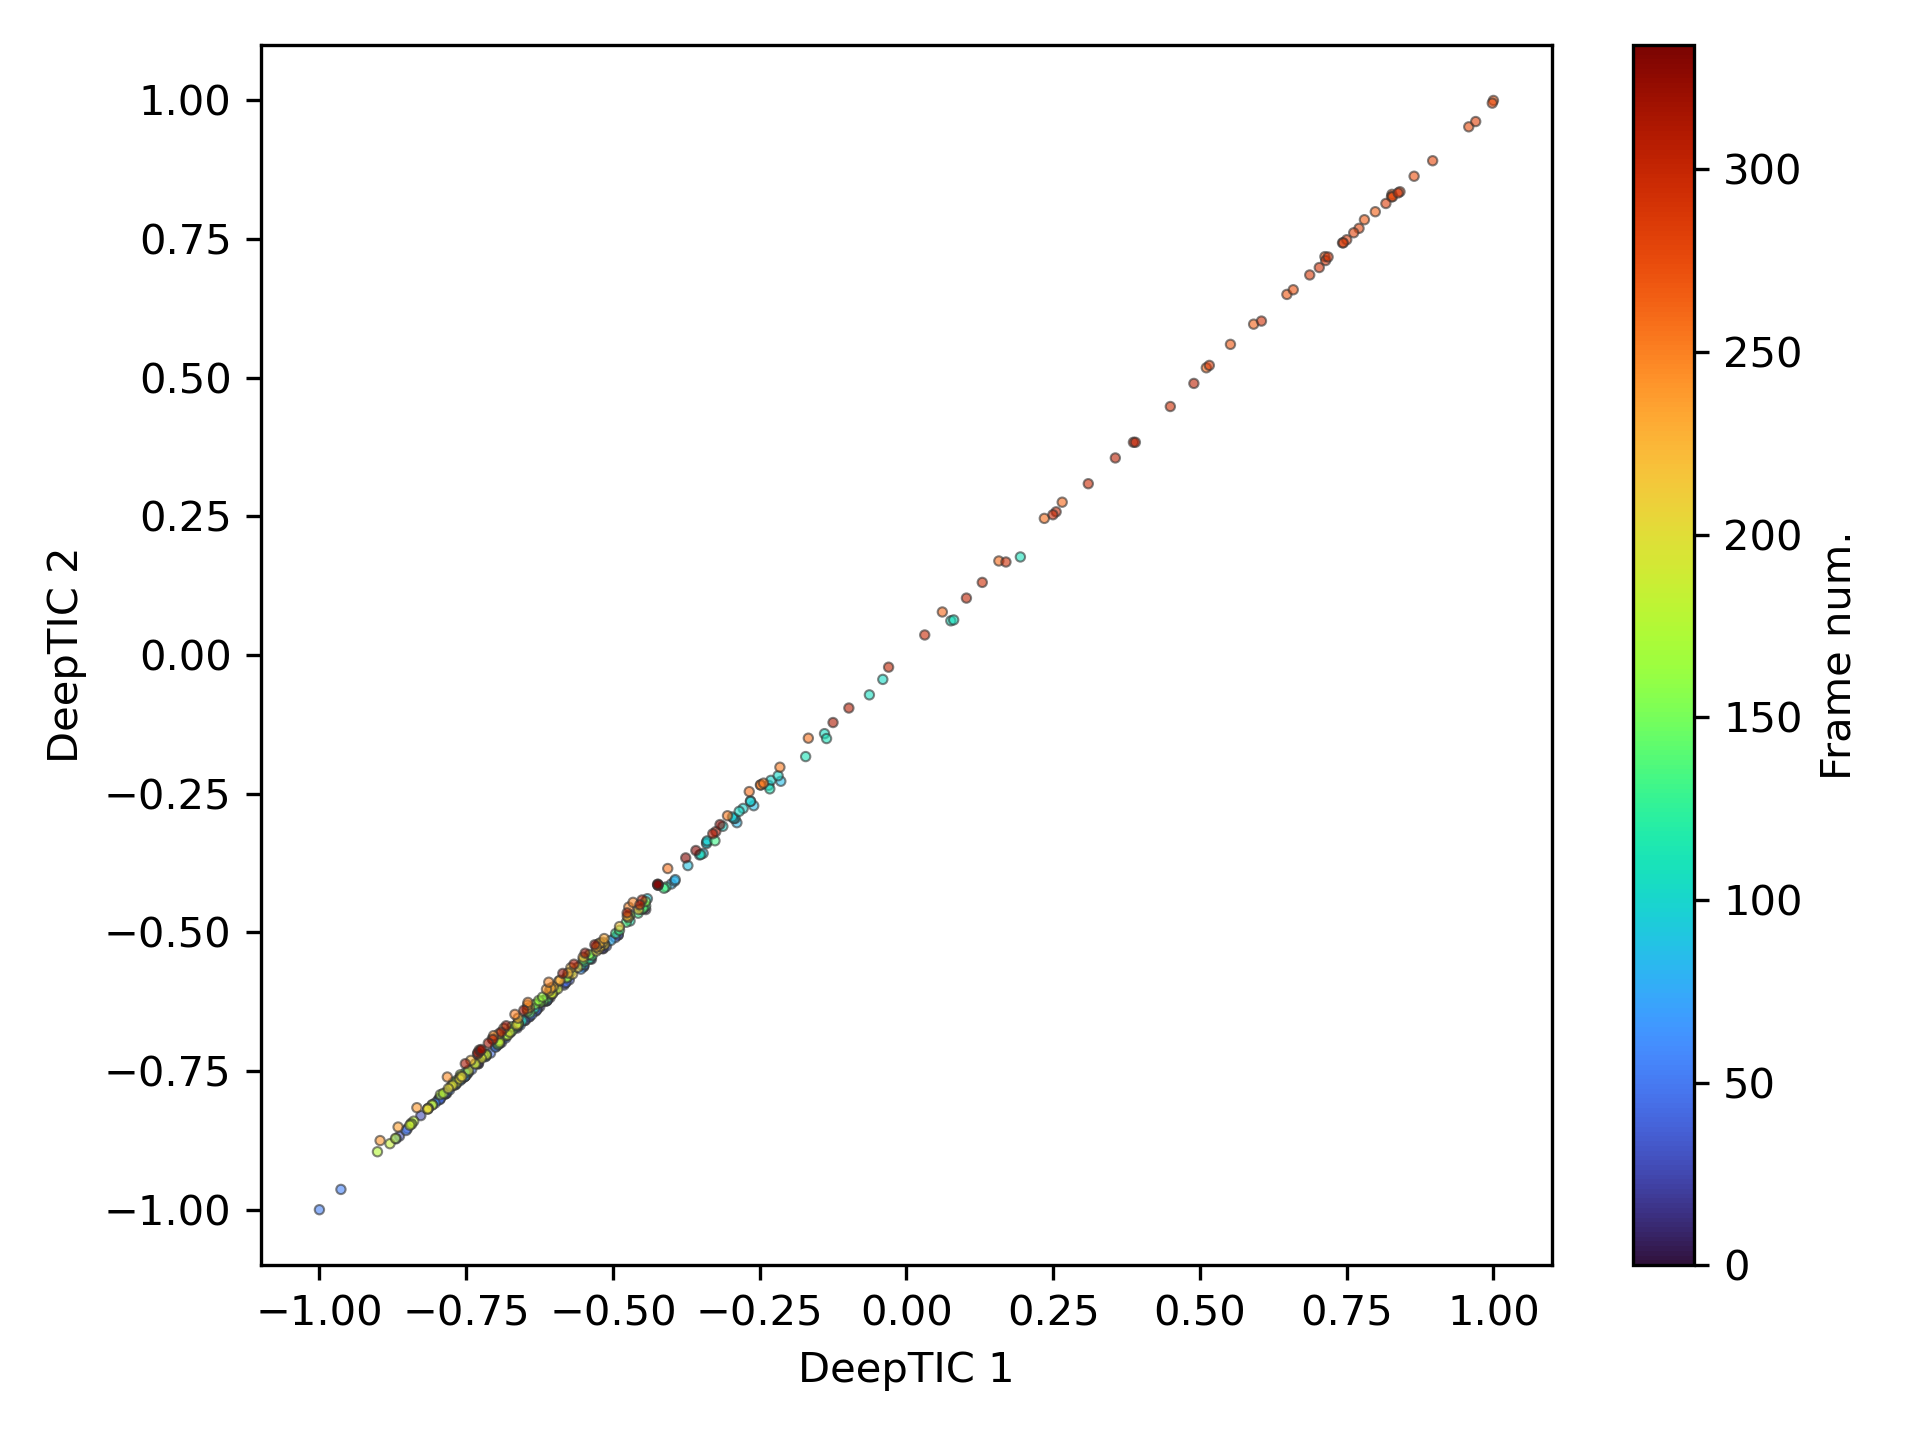

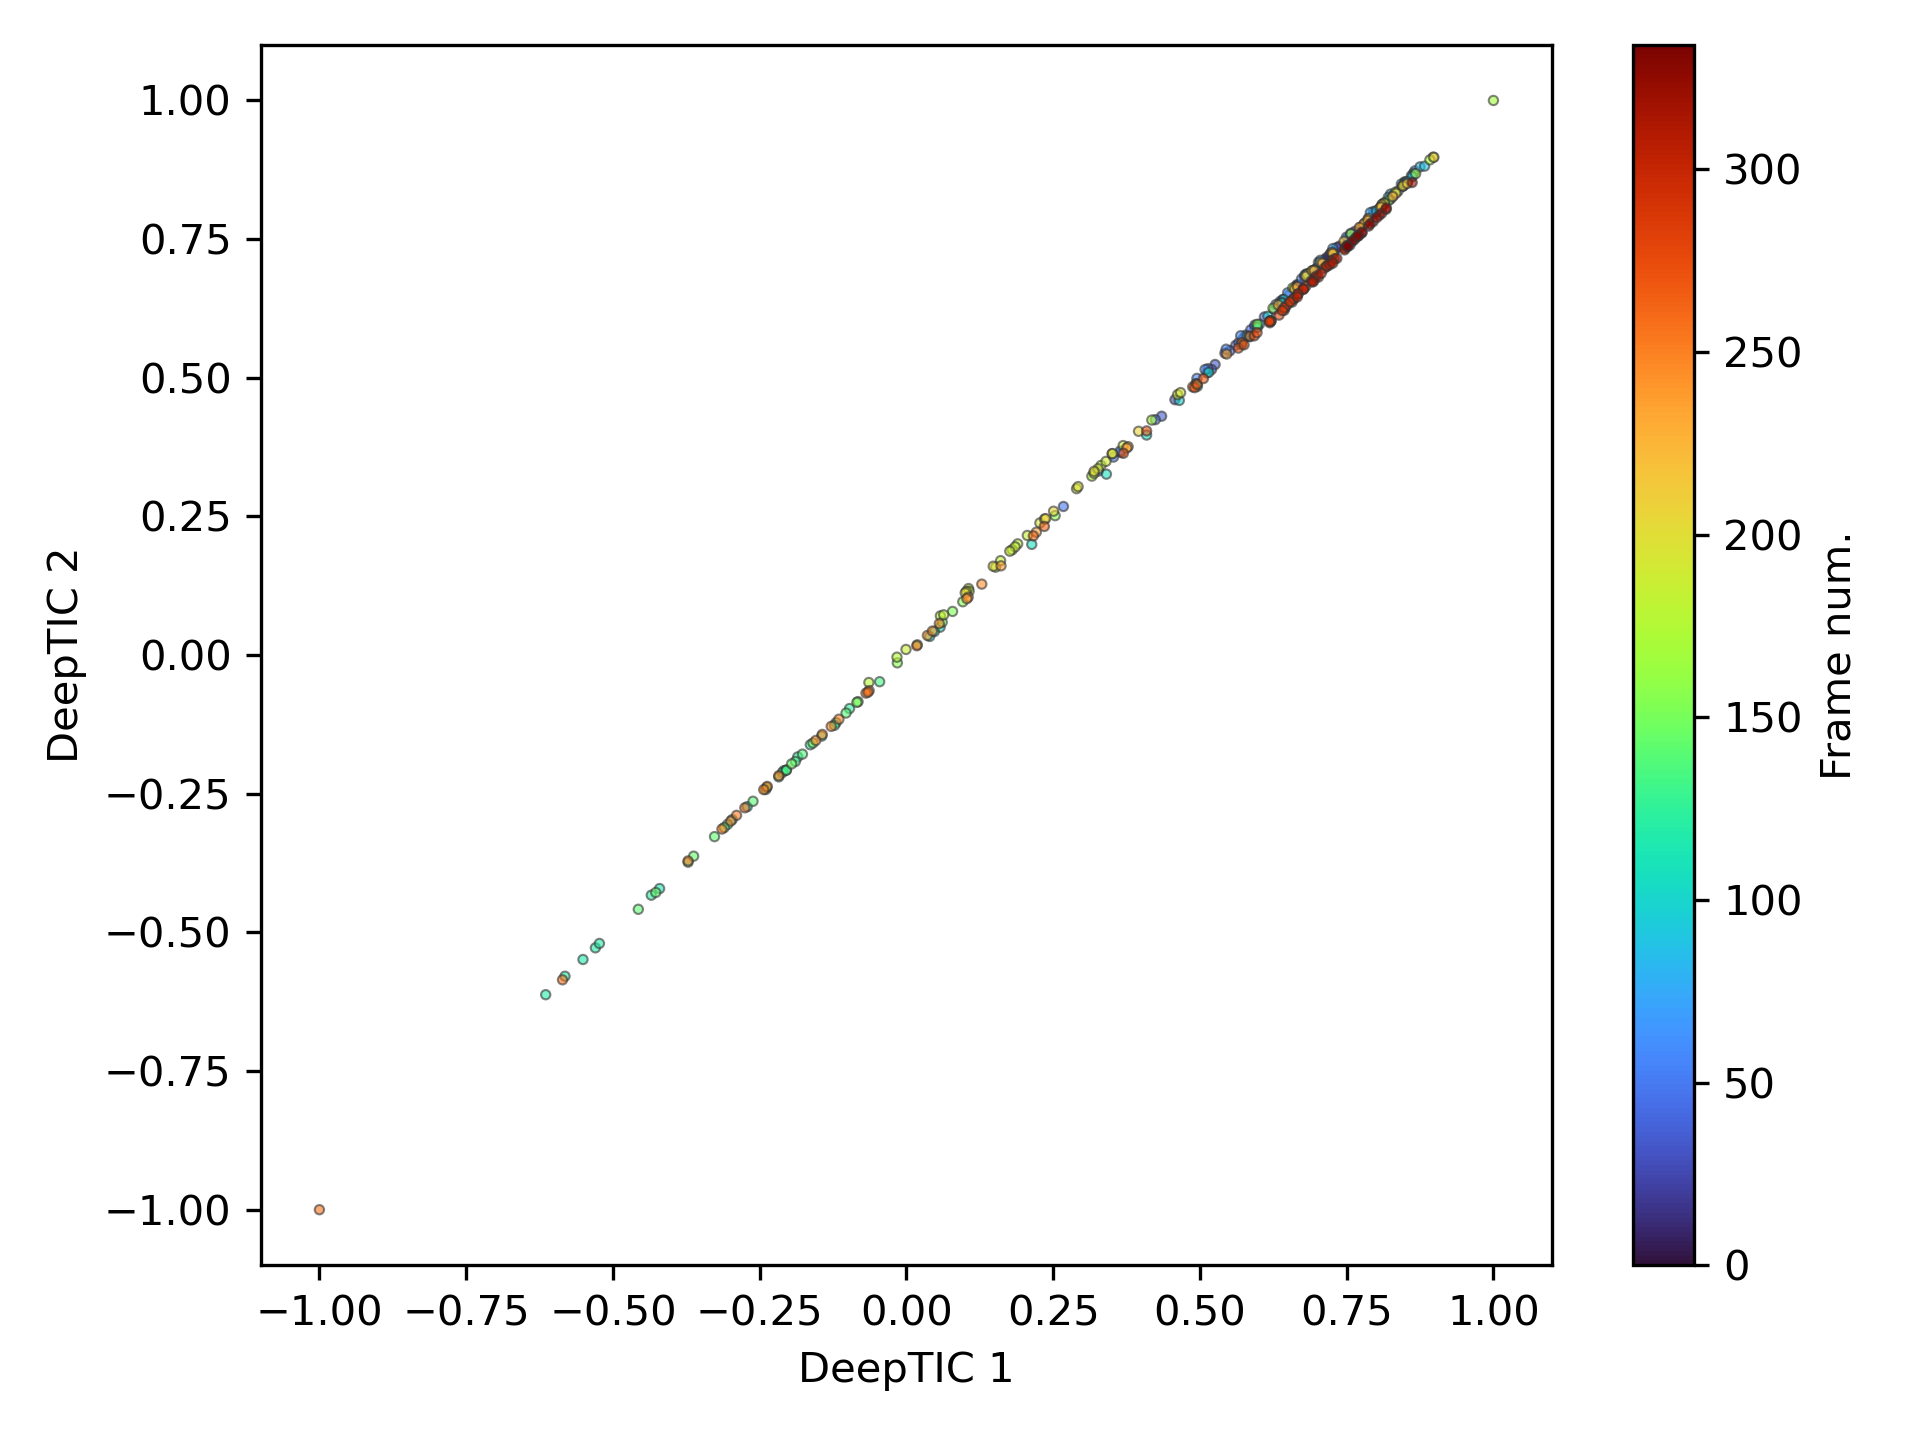

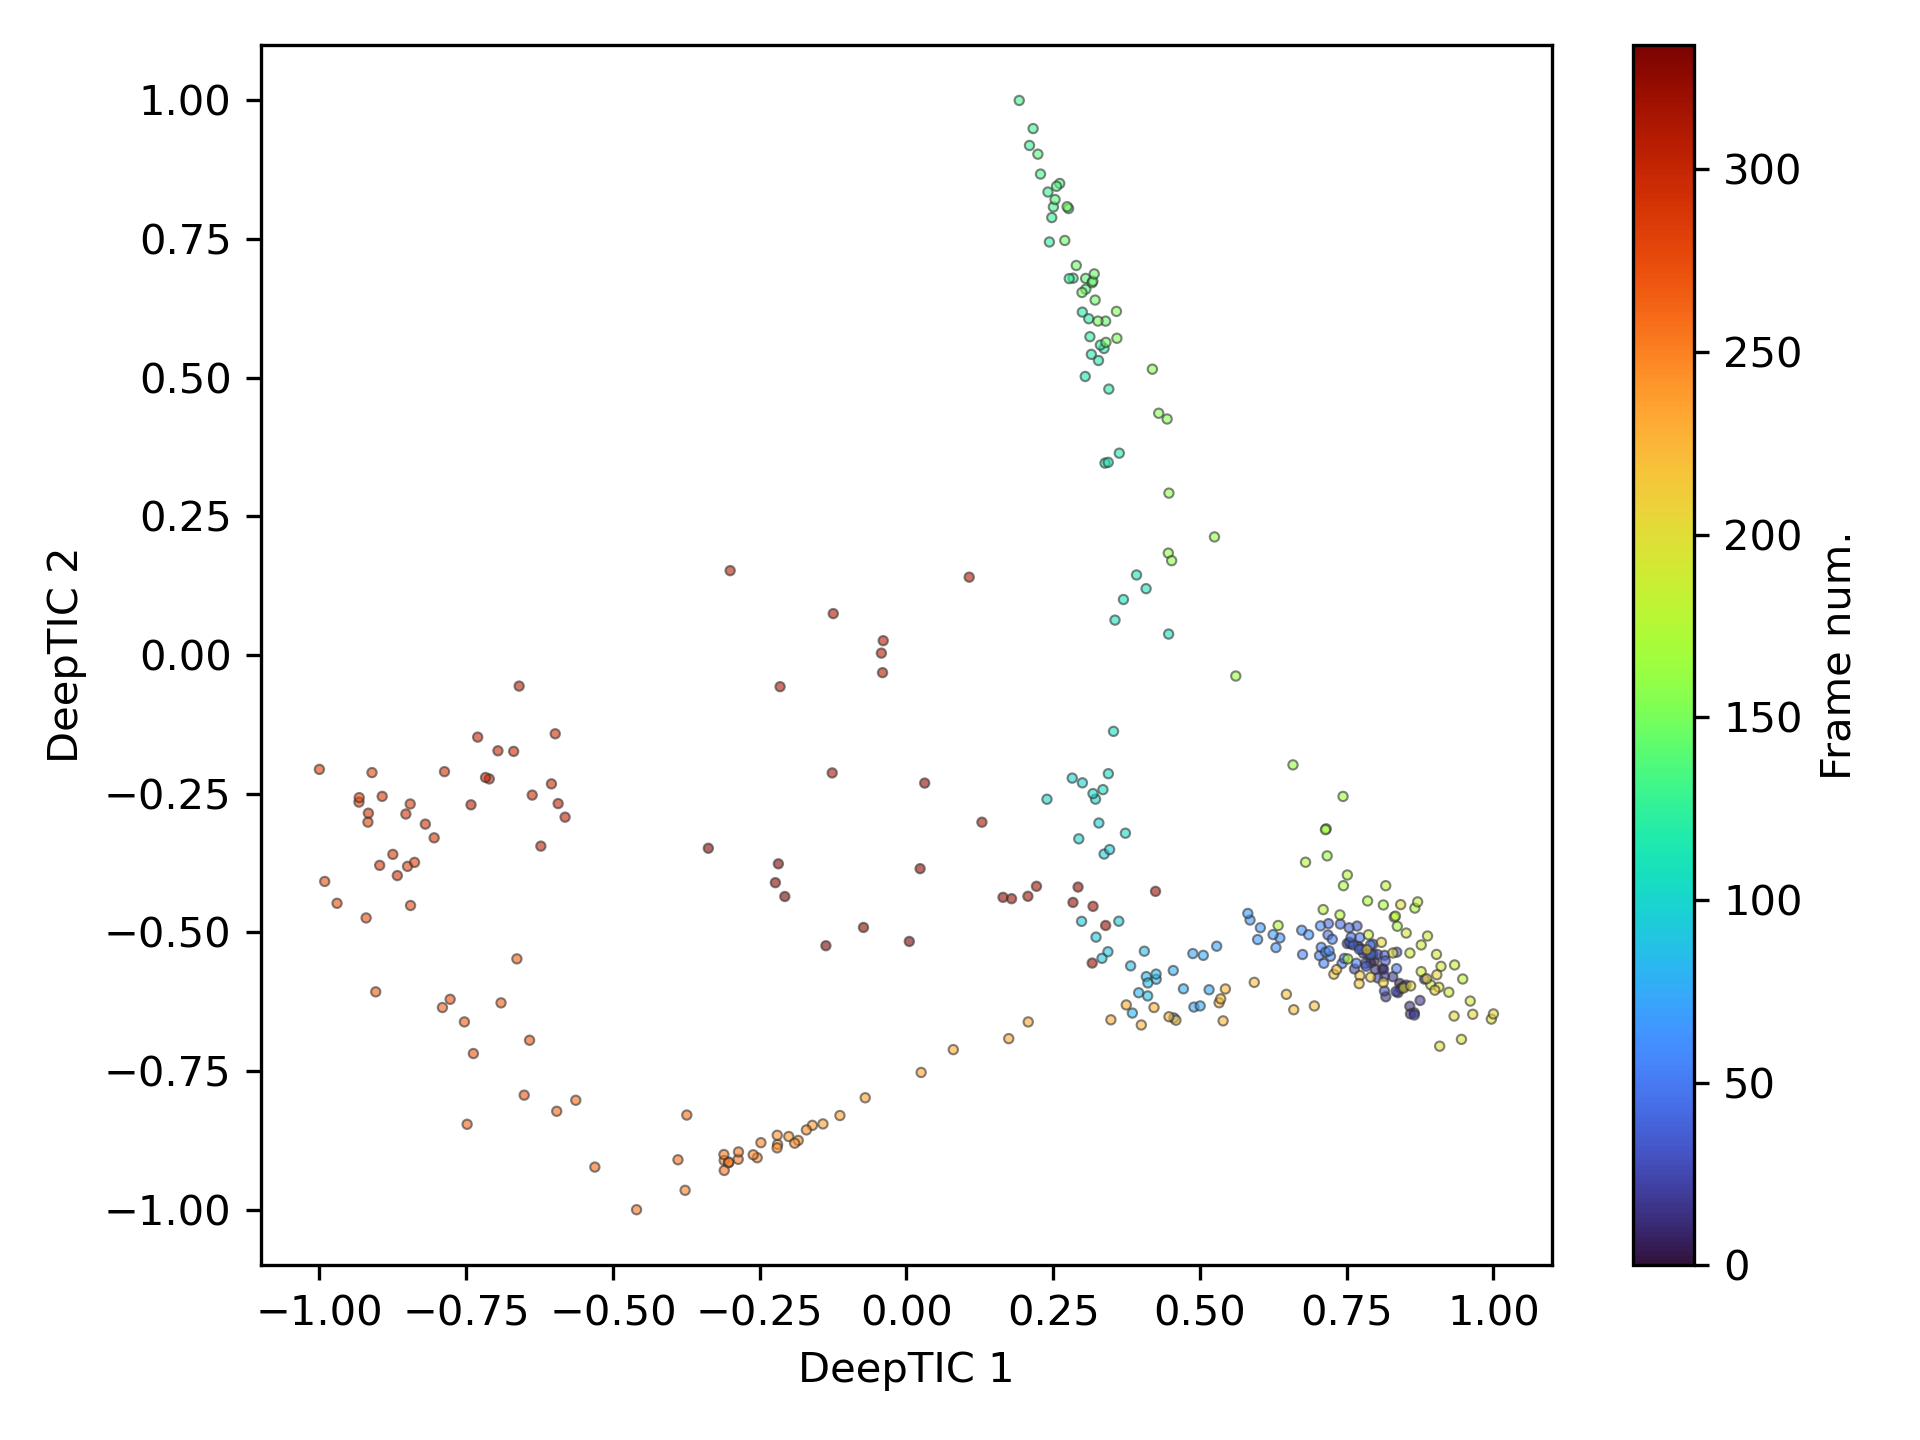

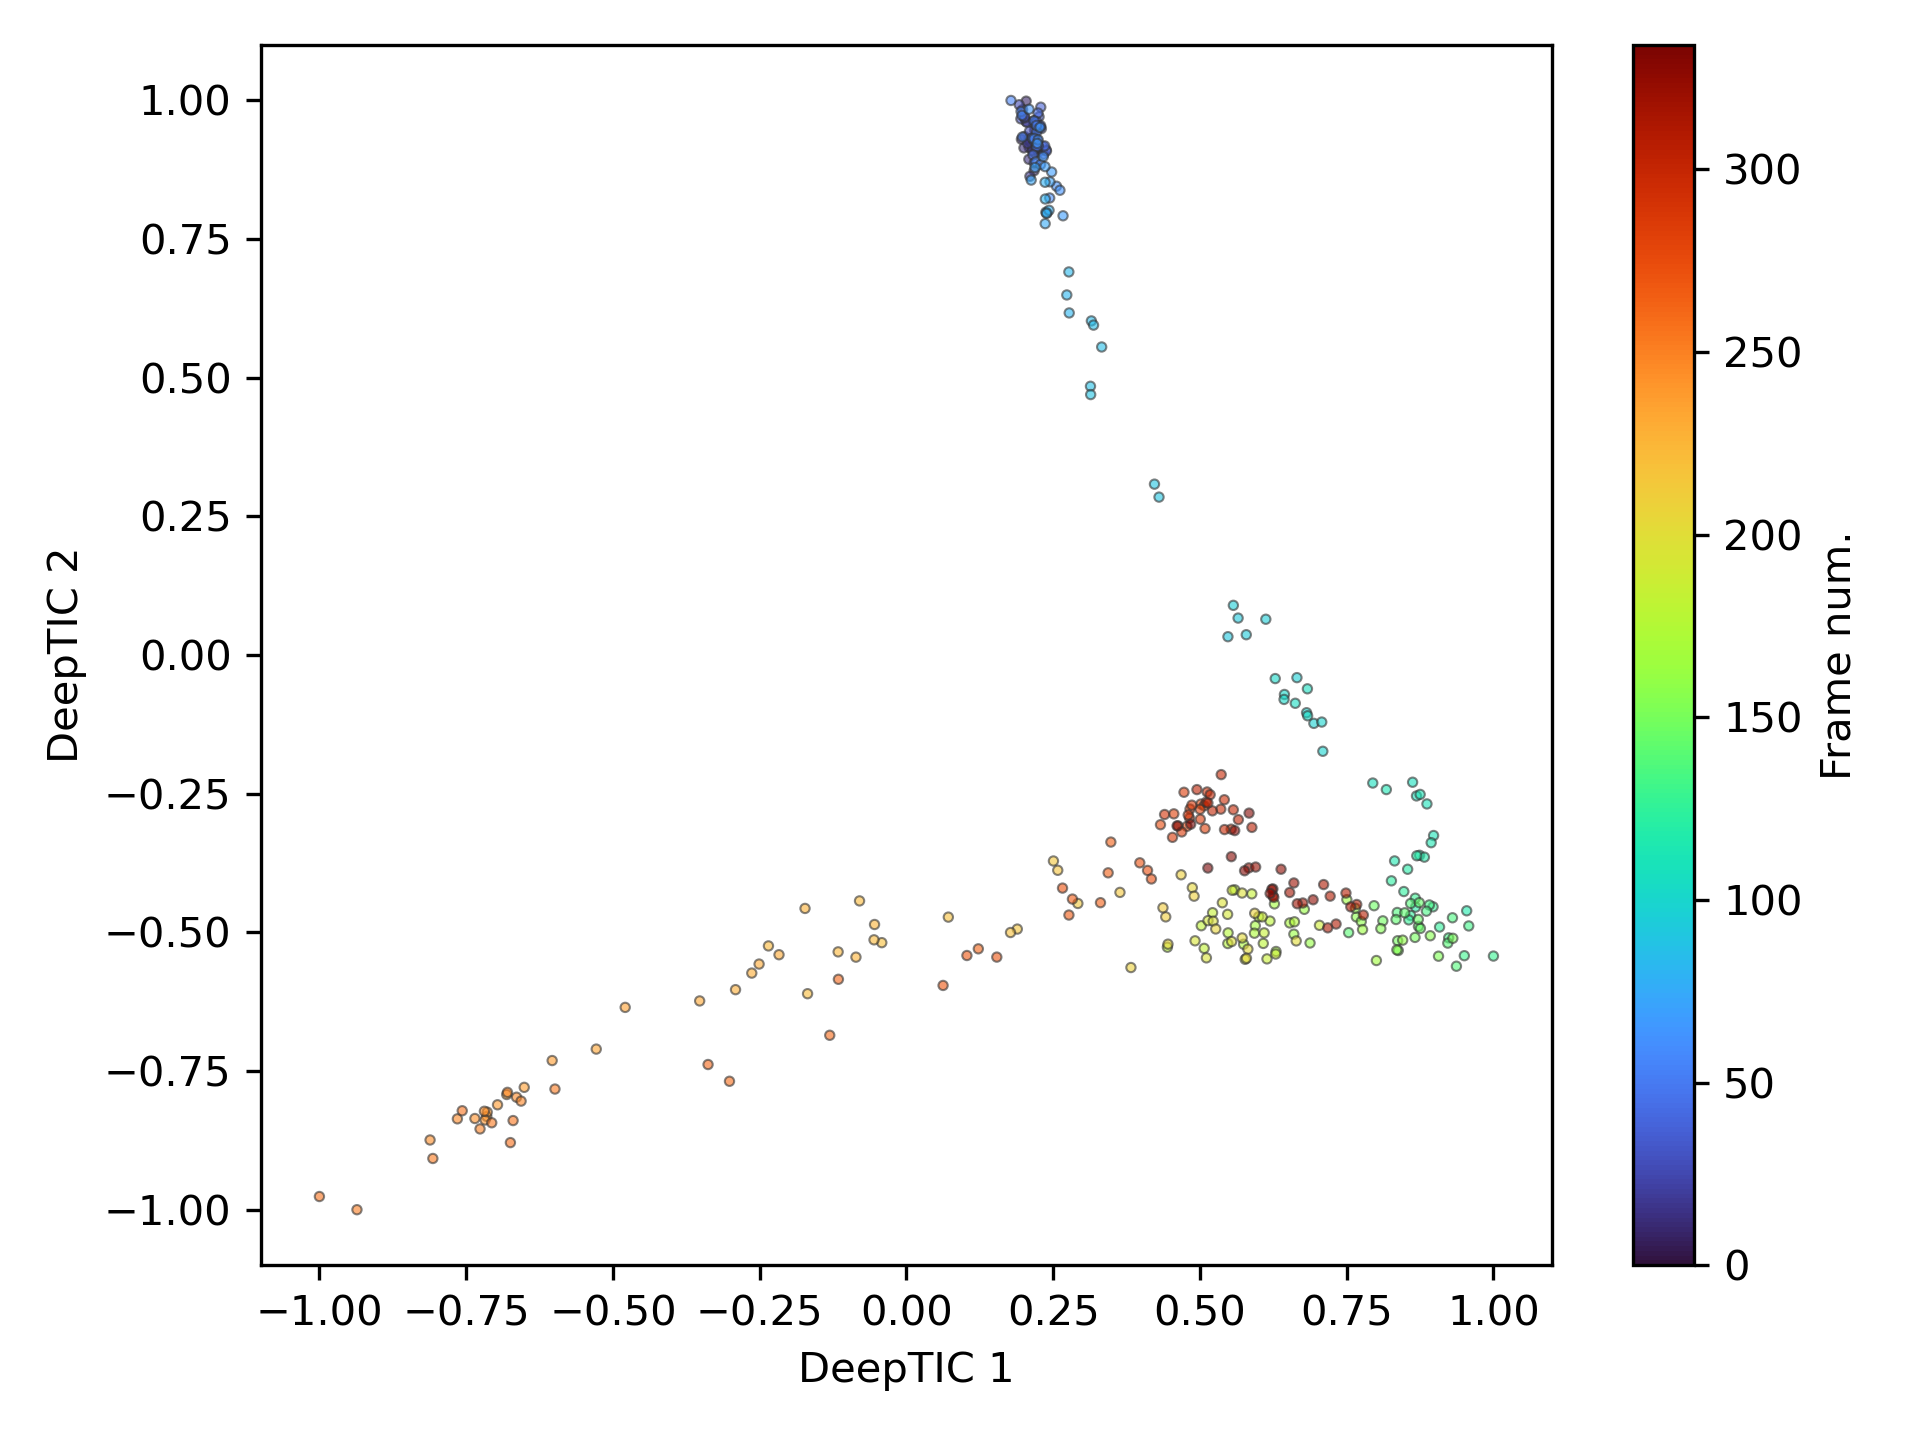

In [54]:
# Show results
show_results(system_name, test_names, 'deep_tica', 'trajectory')

## Learning rate

### Autoencoder

### Deep tica

## Dropout

### Autoencoder

### Deep tica

## Lag time

### TICA

### Deep TICA